In [160]:
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import curve_fit
import math
import random as rnd
import numpy as np

In [3]:
def task1func(x):
  return 2**x - 2*(x**2) - 1

Text(0, 0.5, 'y')

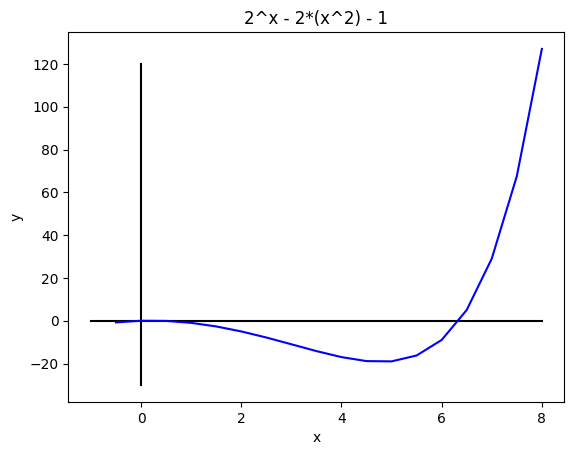

In [49]:
x = [x / 2.0 for x in range(-1, 17)]
y = [task1func(xi) for xi in x]

ax = plt.gca()
ax.plot([-1, 8],[0, 0], color='k')
ax.plot([0, 0],[-30, 120], color='k')
plt.plot(x, y, color='b')
ax.set_title('2^x - 2*(x^2) - 1')
ax.set_xlabel('x')
ax.set_ylabel('y')

Text(0, 0.5, 'y')

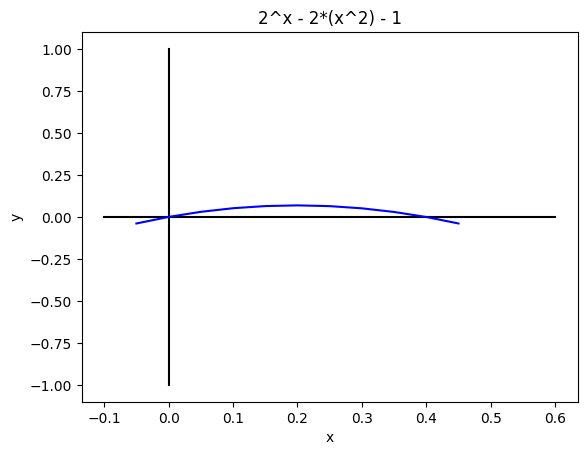

In [47]:
x = [x / 20.0 for x in range(-1, 10)]
y = [task1func(xi) for xi in x]

ax = plt.gca()
ax.plot([-0.1, 0.6],[0, 0], color='k')
ax.plot([0, 0],[-1, 1], color='k')
plt.plot(x, y, color='b')
ax.set_title('2^x - 2*(x^2) - 1')
ax.set_xlabel('x')
ax.set_ylabel('y')

##### Локализация корней
x[1] ~ 0          
x[2] ~ 1      
x[3] ~ 6

In [33]:
# Поиск корней
epsilon = 0.001
X0 = [0, 1, 6]
X = [fsolve(task1func, x0, xtol=epsilon) for x0 in X0]
print(X)

[array([0.]), array([0.39928076]), array([6.35235538])]


In [50]:
# Нормальное и равномерно распределиние

def normal(N):
  return [rnd.gauss(0, 1) for x in range(N)]

def uniform(N):
  return [rnd.uniform(- 3**0.5, 3**0.5) for x in range(N)]

In [96]:
def plot_hists(N, bins):
  plt.figure(figsize=(20, 3))
  for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.hist(normal(N), bins=bins)
    plt.hist(uniform(N), bins=bins)

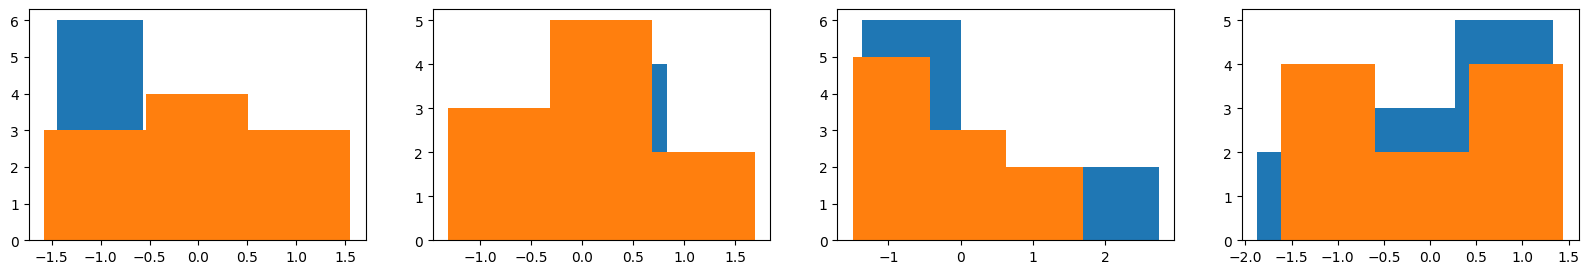

In [97]:
plot_hists(10, 3)

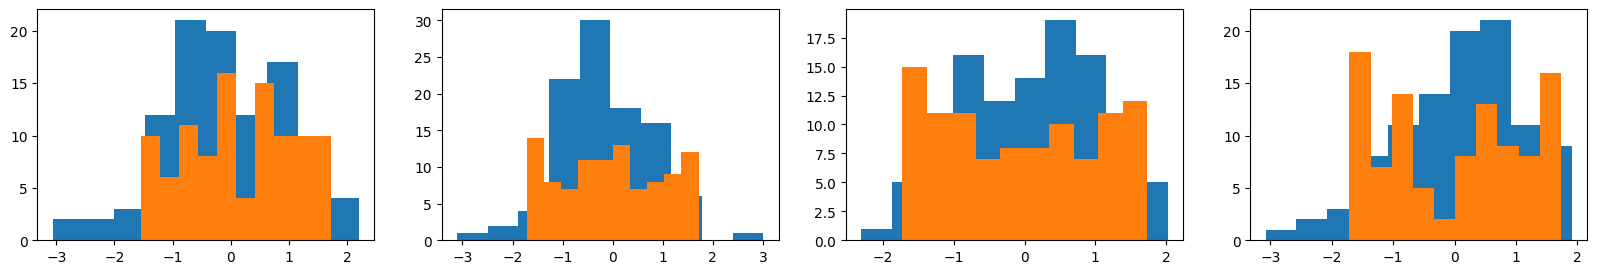

In [98]:
plot_hists(100, 10)

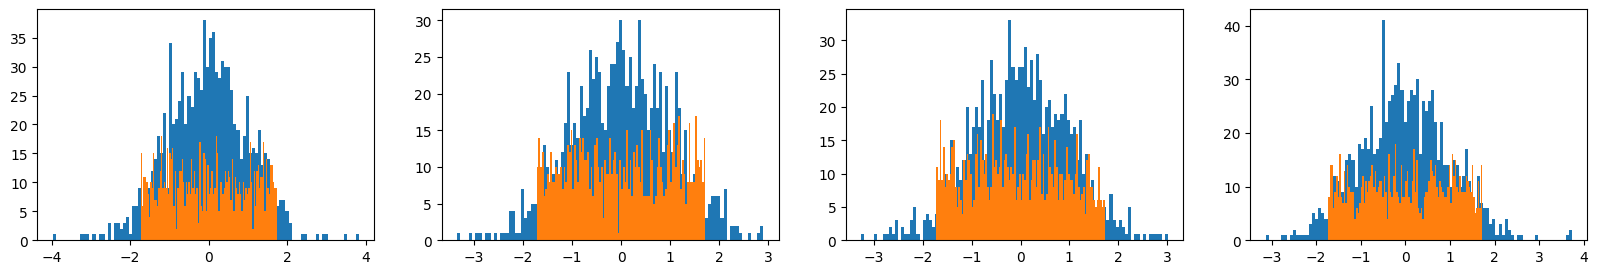

In [99]:
plot_hists(1000, 100)

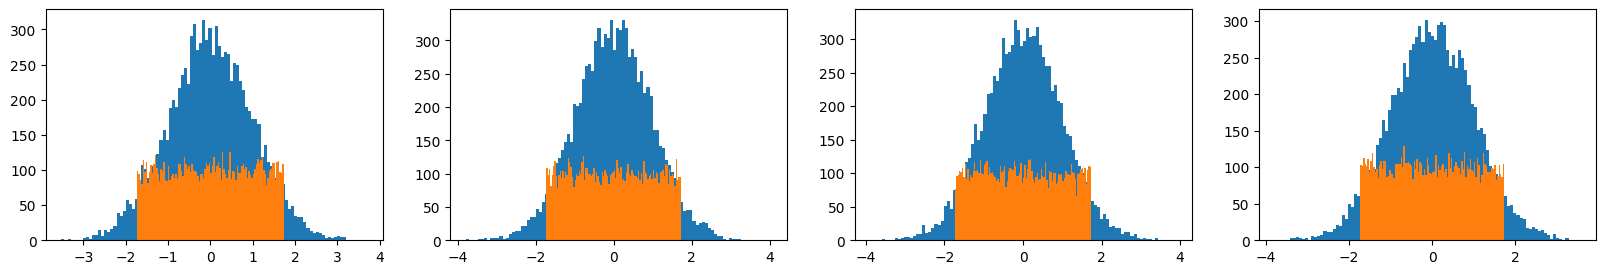

In [225]:
plot_hists(10000, 100)

In [228]:
def task4_approximate(X, Y):
  Y_old = Y
  X = np.array(X)
  Y = np.transpose(np.array(Y))

  lin_W = []
  for i in range(len(X)):
    lin_W.append([1, X[i]])
  lin_W = np.array(lin_W)
  lin_A = np.matmul(np.transpose(np.matmul(np.transpose(lin_W), Y)), np.linalg.inv(np.matmul(np.transpose(lin_W), lin_W)));
  lin_A =  np.transpose(lin_A);
  linear = lambda x: lin_A[0] + lin_A[1] * x;

  par_W = []
  for i in range(len(X)):
    par_W.append([1, X[i], X[i]**2])
  par_W = np.array(par_W)
  par_A = np.matmul(np.transpose(np.matmul(np.transpose(par_W), Y)), np.linalg.inv(np.matmul(np.transpose(par_W), par_W)));
  par_A =  np.transpose(par_A);
  parabol = lambda x: par_A[0] + par_A[1] * x + par_A[2] * x ** 2;

  kub_W = []
  for i in range(len(X)):
    kub_W.append([1, X[i], X[i]**2, X[i]**3])
  kub_W = np.array(kub_W)
  kub_A = np.matmul(np.transpose(np.matmul(np.transpose(kub_W), Y)), np.linalg.inv(np.matmul(np.transpose(kub_W), kub_W)));
  kub_A =  np.transpose(kub_A);
  cubik = lambda x: kub_A[0] + kub_A[1] * x + kub_A[2] * x ** 2;

  def custom_func(a, b, c, x):
    return a * math.cos(b*x) + c
  popt, pcov = curve_fit(custom_func, X, Y_old, [2, 2, 1])
  print(popt)
  custom = lambda x: custom_func(*popt, x)
  return  linear, parabol, cubik, custom

[ 1.76019557 -0.21428563  0.61043159]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


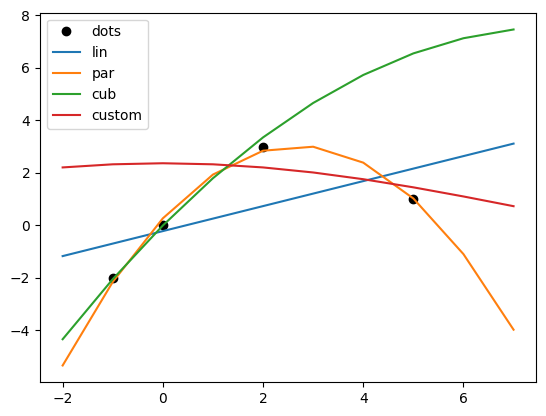

In [229]:
dots_X = [0, 5, 2, -1]
dots_Y = [0, 1, 3, -2]
linear, parabol, cubik, custom = task4_approximate(dots_X, dots_Y);

x = [x / 1.0 for x in range(-2, 8)]
linear_y = [linear(xi) for xi in x]
parabol_y = [parabol(xi) for xi in x]
cubik_y = [cubik(xi) for xi in x]
custom_y = [custom(xi) for xi in x]
plt.plot(dots_X, dots_Y, 'ko')
plt.plot(x, linear_y)
plt.plot(x, parabol_y)
plt.plot(x, cubik_y)
plt.plot(x, custom_y)
plt.legend(['dots', 'lin', 'par', 'cub', 'custom'])

[-59.5742502    6.37786453  32.43948425]


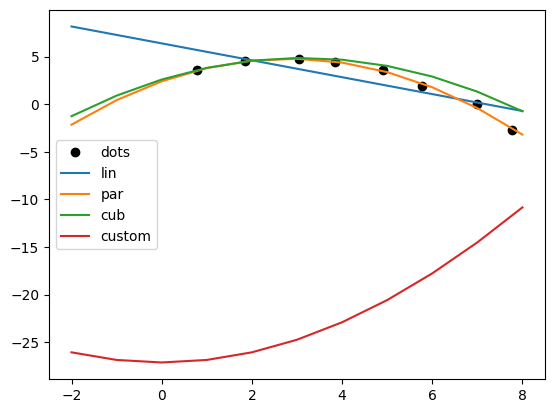

In [230]:
dots_X = [0.78, 1.85, 3.05, 3.84, 4.91, 5.78, 6.99, 7.77]
dots_Y = [3.55, 4.48, 4.72, 4.46, 3.55, 1.95, -0.02, -2.71]
linear, parabol, cubik, custom = task4_approximate(dots_X, dots_Y);

x = [x / 1.0 for x in range(-2, 9)]
linear_y = [linear(xi) for xi in x]
parabol_y = [parabol(xi) for xi in x]
cubik_y = [cubik(xi) for xi in x]
custom_y = [custom(xi) for xi in x]
plt.plot(dots_X, dots_Y, 'ko')
plt.plot(x, linear_y)
plt.plot(x, parabol_y)
plt.plot(x, cubik_y)
plt.plot(x, custom_y)
plt.legend(['dots', 'lin', 'par', 'cub', 'custom'])